In [1]:
import numpy as np
from numpy import exp,log,sum
from numpy.linalg import inv
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X = np.loadtxt('ex4x.dat')
y = np.loadtxt('ex4y.dat')
X = np.c_[np.ones_like(y),X]

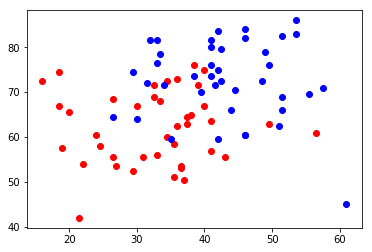

In [3]:
plt.plot(X[y==0.0,1],X[y==0.0,2],'o',color='r')
plt.plot(X[y==1.0,1],X[y==1.0,2],'o',color='b')
plt.show()

In [4]:
def sig(x):
    return 1./(1.+exp(-x))

def h(x, theta):
    return sig(x @ theta)

def likelihood(x, y, theta):
    prob = h(x, theta)
    s1 = log(prob[y==1.]).sum()
    s2 = log(1-prob[y==0.]).sum()
    return s1 + s2

def grad(x, y, theta):
    error = np.expand_dims(y - h(x, theta), axis=1)
    return np.sum(error * x , axis=0)

In [5]:
def numerical_grad(f, x, eps=1e-8):
    g = np.empty_like(theta)
    for i in range(g.shape[0]):
        dx = np.zeros_like(x)
        dx[i] += eps
        g[i] = (f(x+dx) - f(x))/eps
    return g

In [6]:
theta = np.zeros(3)

In [7]:
grad(X, y, theta)

array([  0.  , 204.5 , 210.25])

In [8]:
numerical_grad(lambda theta: likelihood(X, y, theta), theta)

array([  0.        , 204.49984746, 210.24953654])

In [9]:
theta = np.array([-16.37874341,   0.14834077,   0.15890845])


In [10]:
grad(X, y, theta)

array([2.75050057e-06, 1.08023612e-04, 1.86181478e-04])

In [11]:
numerical_grad(lambda theta: likelihood(X, y, theta), theta, eps=1e-8)

array([ 2.84217094e-06,  2.70006240e-05, -5.40012479e-05])

# GD

In [12]:
theta = np.zeros(3)
alpha = 1.7e-5

for i in range(1000000):
    
    if i % 10000 == 0:
        print(i,likelihood(X, y, theta))
    theta += alpha * grad(X, y, theta)

0 -55.451774444795625
10000 -51.33447187187888
20000 -49.676555823098056
30000 -48.20733553949631
40000 -46.902687692870316
50000 -45.74130370319722
60000 -44.704583960165714
70000 -43.776423027604984
80000 -42.94294467833578
90000 -42.192225516545484
100000 -41.51403009027448
110000 -40.899569294165744
120000 -40.34128675856351
130000 -39.832673736360555
140000 -39.368110761060485
150000 -38.9427333230813
160000 -38.55231849263683
170000 -38.19318948354151
180000 -37.862135406336904
190000 -37.556343787182136
200000 -37.27334376841473
210000 -37.01095822584412
220000 -36.76726332277303
230000 -36.540554267358004
240000 -36.329316249241785
250000 -36.132199706833035
260000 -35.9479992224593
270000 -35.775635463250694
280000 -35.61413968508654
290000 -35.4626403988362
300000 -35.320351865530895
310000 -35.18656414259788
320000 -35.06063444902477
330000 -34.94197965506257
340000 -34.83006973328207
350000 -34.72442203364487
360000 -34.624596266707655
370000 -34.53019009693216
380000 -34.4

In [13]:
theta

array([-14.03277146,   0.13079858,   0.13442763])

# SGD

In [18]:
np.random.randint(y.shape[0], size = 1)

array([8])

In [19]:
theta = np.zeros(3)
alpha = 1.7e-4

best_like = -np.inf
best_theta = None

for i in range(1000000):
    
    idx = np.random.randint(y.shape[0], size = 1)
    
    if i % 10000 == 0:
        print(i,likelihood(X, y, theta))
    theta += alpha * grad(X[idx,:], y[idx], theta)
    
    current_like = likelihood(X,y,theta)
    if current_like > best_like:
        best_like = current_like
        best_theta = theta.copy()


0 -55.451774444795625
10000 -53.20286163478794
20000 -59.970252544445884
30000 -52.52834676874746
40000 -53.37688401184337
50000 -53.39408949223787
60000 -56.71907467489264
70000 -51.947602135406605
80000 -51.382446888951606
90000 -64.98985221775791
100000 -51.39451082646751
110000 -51.086221932688176
120000 -52.35650727428612
130000 -50.69030591663221
140000 -54.593966124886045
150000 -53.513487430413406
160000 -49.88270045437465
170000 -49.56045857356312
180000 -68.44788582757428
190000 -49.63318446744321
200000 -49.62472878597455
210000 -66.79808482920238
220000 -62.28785743479594
230000 -51.66989719891322
240000 -50.33479152275608
250000 -61.96407850342692
260000 -58.79716014609943
270000 -48.52723792215254
280000 -49.29381989455576
290000 -52.98336348921607
300000 -53.644414936017114
310000 -50.21926728785441
320000 -47.0218249229195
330000 -47.22105523178347
340000 -46.728098786988554
350000 -82.03493982845494
360000 -46.3245526529777
370000 -59.74380851422976
380000 -53.13681808

In [20]:
best_theta,best_like

(array([-5.33111616,  0.07258823,  0.0396464 ]), -39.822541123193965)

# Newton

In [21]:
def hess(x, theta):
    _h = h(x, theta)
    return (x.T * _h * (1 - _h)) @ X

In [22]:
inv(hess(X, np.zeros(3)))

array([[ 2.64273777e+00, -1.14611834e-02, -3.20405451e-02],
       [-1.14611834e-02,  5.48681061e-04, -1.38115496e-04],
       [-3.20405451e-02, -1.38115496e-04,  5.53094765e-04]])

In [23]:
theta = np.zeros(3)
alpha = 1.7e-1

for i in range(100):
    
    if i % 10 == 0:
        print(i,likelihood(X, y, theta))
    
    _grad = grad(X, y, theta)
    _hess = hess(X, theta)
    
    theta += alpha * (inv(_hess) @ _grad)
    

0 -55.451774444795625
10 -34.124645828611264
20 -32.50408783454258
30 -32.43763845234177
40 -32.435839260702664
50 -32.43579508733277
60 -32.43579402058752
70 -32.43579399489359
80 -32.43579399427496
90 -32.43579399426007


In [24]:
theta

array([-16.37874293,   0.14834077,   0.15890845])

# scipy

In [25]:
import scipy.optimize

In [26]:
scipy.optimize.minimize(lambda theta: -likelihood(X,y, theta), np.zeros(3))

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


      fun: 32.43579399437657
 hess_inv: array([[ 0.00110774,  0.00109709, -0.00062123],
       [ 0.00109709,  0.00109714, -0.0006211 ],
       [-0.00062123, -0.0006211 ,  0.00037159]])
      jac: array([-4.76837158e-07, -2.19345093e-05, -2.86102295e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 168
      nit: 17
     njev: 32
   status: 2
  success: False
        x: array([-16.37868849,   0.14834042,   0.15890784])

In [27]:
scipy.optimize.minimize(lambda theta: -likelihood(X,y, theta), np.zeros(3), options = {"maxiter":0})

      fun: 55.451774444795625
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([   0.        , -204.49977207, -210.24930906])
  message: 'Maximum number of iterations has been exceeded.'
     nfev: 5
      nit: 0
     njev: 1
   status: 1
  success: False
        x: array([0., 0., 0.])

In [28]:
scipy.optimize.minimize(lambda theta: -likelihood(X,y, theta), np.zeros(3), options = {"maxiter":1})

D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


      fun: 55.07508000717154
 hess_inv: array([[ 1.        , -0.00913778, -0.00939469],
       [-0.00913778,  0.80663649, -0.45874049],
       [-0.00939469, -0.45874049,  0.26111316]])
      jac: array([  4.06421757, -46.0636611 ,  68.2552228 ])
  message: 'Maximum number of iterations has been exceeded.'
     nfev: 32
      nit: 1
     njev: 5
   status: 1
  success: False
        x: array([0.        , 0.00190393, 0.00195746])

# statsmodels

In [29]:
import statsmodels.api as sm

In [30]:
logit_mod = sm.Logit(y, X)
logit_res = logit_mod.fit(disp=0)
param = logit_res.params
param

array([-16.37874341,   0.14834077,   0.15890845])

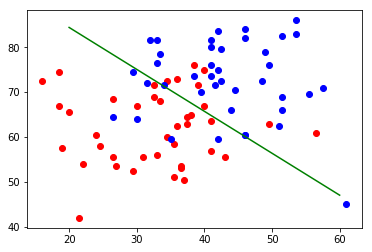

In [31]:
plt.plot(X[y==0.0,1],X[y==0.0,2],'o',color='r')
plt.plot(X[y==1.0,1],X[y==1.0,2],'o',color='b')
b = -param[0]/param[2]
k = -param[1]/param[2]
_x = np.linspace(20,60,100)
_y = b + k * _x
plt.plot(_x, _y, color='g')
plt.show()

# animation

In [32]:
theta = np.zeros(3)
alpha = 1.7e-5

likelihood_list = []
param_list = []

for i in range(1000000):
    
    if i % 10000 == 0:
        print(i,likelihood(X, y, theta))
        likelihood_list.append(likelihood(X, y, theta))
        param_list.append(theta.copy())
    theta += alpha * grad(X, y, theta)

0 -55.451774444795625
10000 -51.33447187187888
20000 -49.676555823098056
30000 -48.20733553949631
40000 -46.902687692870316
50000 -45.74130370319722
60000 -44.704583960165714
70000 -43.776423027604984
80000 -42.94294467833578
90000 -42.192225516545484
100000 -41.51403009027448
110000 -40.899569294165744
120000 -40.34128675856351
130000 -39.832673736360555
140000 -39.368110761060485
150000 -38.9427333230813
160000 -38.55231849263683
170000 -38.19318948354151
180000 -37.862135406336904
190000 -37.556343787182136
200000 -37.27334376841473
210000 -37.01095822584412
220000 -36.76726332277303
230000 -36.540554267358004
240000 -36.329316249241785
250000 -36.132199706833035
260000 -35.9479992224593
270000 -35.775635463250694
280000 -35.61413968508654
290000 -35.4626403988362
300000 -35.320351865530895
310000 -35.18656414259788
320000 -35.06063444902477
330000 -34.94197965506257
340000 -34.83006973328207
350000 -34.72442203364487
360000 -34.624596266707655
370000 -34.53019009693216
380000 -34.4

In [33]:
likelihood_array = np.array(likelihood_list)
param_array = np.array(param_list)

In [34]:

def get_y(_x, param):
    b = -param[0]/param[2]
    k = -param[1]/param[2]
    _y = b + k * _x
    return _y

from matplotlib.animation import FuncAnimation

def make_anim(likelihood_array, param_array, cache_name = 'line.html'):

    fig, (ax_loss, ax_line) = plt.subplots(1,2, figsize=(10,5))
    fig.set_tight_layout(True)

    plt.plot(X[y==0.0,1],X[y==0.0,2],'o',color='r')
    plt.plot(X[y==1.0,1],X[y==1.0,2],'o',color='b')

    _x = np.linspace(20,60,100)
    _y = get_y(_x, param_array[0])

    ax_loss.set_xlim(0,  param_array.shape[0])
    ax_loss.set_ylim(-60, 0)

    line, = ax_line.plot(_x, _y, 'g-', linewidth=2)

    #plt.show()

    def update(i):
        ax_loss.plot(i, likelihood_array[i], 'o-', color='b')
        _y = get_y(_x, param_array[i])
        line.set_ydata(_y)

    anim = FuncAnimation(fig, update, frames=np.arange(0, param_array.shape[0]), interval=200)
    anim.save(cache_name, dpi=80, writer='html')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


D:\anaconda\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


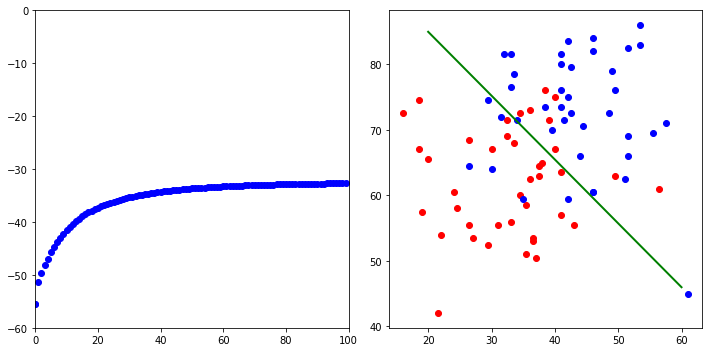

In [35]:
# GD
make_anim(likelihood_array, param_array, 'line3.html')
from IPython.display import HTML
HTML('line3.html')

In [36]:
theta = np.zeros(3)
alpha = 1.7e-1

likelihood_list = []
param_list = []


for i in range(100):
    
    likelihood_list.append(likelihood(X, y, theta))
    param_list.append(theta.copy())

    if i % 1 == 0:
        print(i,likelihood(X, y, theta))
    
    _grad = grad(X, y, theta)
    _hess = hess(X, theta)
    
    theta += alpha * (inv(_hess) @ _grad)
    


0 -55.451774444795625
1 -49.924031176298996
2 -45.9658632728969
3 -42.98033886593017
4 -40.66613114057812
5 -38.84746842302786
6 -37.410056526747866
7 -36.27324363694959
8 -35.37662476302115
9 -34.67303923493961
10 -34.124645828611264
11 -33.700585147959316
12 -33.375503627149584
13 -33.128559110088574
14 -32.9426977640217
15 -32.804083613993306
16 -32.70161555431308
17 -32.62649933916387
18 -32.57186144345313
19 -32.53240196437113
20 -32.50408783454258
21 -32.48388794137939
22 -32.469550218280844
23 -32.45941875555736
24 -32.452287271159264
25 -32.44728421727287
26 -32.44378440173598
27 -32.44134213544901
28 -32.43964139155216
29 -32.43845910782136
30 -32.43763845234177
31 -32.4370695226427
32 -32.43667551750039
33 -32.436402893275364
34 -32.43621439450486
35 -32.436084141861734
36 -32.435994183290816
37 -32.43593208016726
38 -32.435889222342226
39 -32.435859654582785
40 -32.435839260702664
41 -32.43582519723438
42 -32.43581550082105
43 -32.435808816329484
44 -32.43580420873133
45 -32

In [37]:
likelihood_array = np.array(likelihood_list)
param_array = np.array(param_list)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


D:\anaconda\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


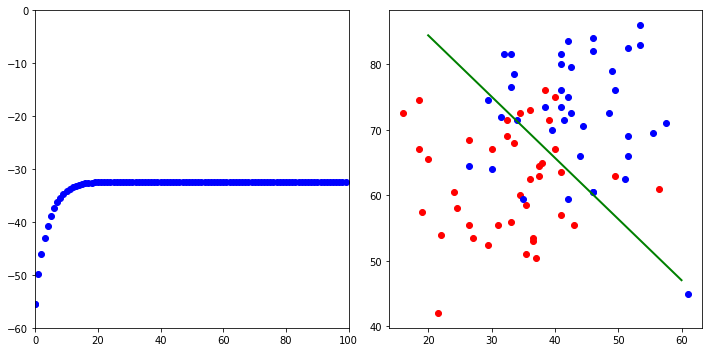

In [38]:
# Newton
make_anim(likelihood_array, param_array, 'line4.html')
from IPython.display import HTML
HTML('line4.html')